In [1]:
### Library necessary to run this IPython Notebook
!pip install facebook-sdk
!pip install statistics

### API >> https://facebook-sdk.readthedocs.io/en/latest/api.html
### Get access token >> https://developers.facebook.com/tools/explorer


## class facebook.GraphAPI
A client for the Facebook Graph API. The Graph API is made up of the objects or nodes in Facebook (e.g., people, pages, events, photos) and the connections or edges between them (e.g., friends, photo tags, and event RSVPs). This client provides access to those primitive types in a generic way.

You can read more about Facebook’s Graph API [here](https://developers.facebook.com/docs/graph-api).

In [2]:
import facebook
graph = facebook.GraphAPI(access_token='EAACEdEose0cBAJVwnoo7GciZAali9I2cJZBSxqTT9jGxTkhZCboc27vvjIKnqyNfZCEpztdPPZCZCDfHdtRecqZBCwBf1ROHEueDc8ryNPCqPcZBHqe6jDRLKFars9xgZBP2ZCnJ0nPZAZClzKQZBtHz5LUU2OvgAFCqHgIjWgsWX2ydplWQGD1x5Lg7T', version='2.2')

In [3]:
### Only friends who installed the Graph API Explorer (facebook >> apps >> Graph API Explorer) 
### are returned in API v2.0 and higher. 

### https://developers.facebook.com/docs/graph-api/reference/v2.2/user/friends

import pandas as pd
import matplotlib

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

friends = graph.get_object("me/friends")


Populating the interactive namespace from numpy and matplotlib


## Criando a lista de IDs
**id_of_friends** é a lista com os IDs dos seus amigos

In [4]:
id_of_friends = []
dictNomeID = {}


for friend in friends['data']:
    #print ("{0} has id {1}".format(friend['name'].encode('utf-8'), friend['id']))
    print ("{0} has id {1}".format(friend['name'], friend['id']))
    id_of_friends.append(friend['id'])
    #dictNomeID[friend['id']] = friend['name'].encode('utf-8')
    dictNomeID[friend['id']] = friend['name']
        
id_of_friends


Alison Silva has id 1032134756839013
Waldyr Fernandes has id 808400389216109
Ana Caroline has id 765831436837419
Heráclito Cesar has id 948685731934130
Pitágoras Alves has id 161313964255674


['1032134756839013',
 '808400389216109',
 '765831436837419',
 '948685731934130',
 '161313964255674']

## Criando o dicionário de categorias curtidas
**dictCategory** é o dicionário de categorias das curtidas do usuário, sendo categoria a chave para a quantidade de curtidas nesta mesma categoria. Em seguida, é feito o top 10 das categorias curtidas pelo usuário.

In [15]:
dictPessoal={}
totalUsuario=0;
likes = graph.get_object("me/likes?fields=name,category")
lista = likes['data']

dictCategory = {}
dictAmizade={}

def keyValorMaximo(d):
    v = list(d.values())
    k = list(d.keys())
    return k[v.index(max(v))]

for like in likes['data']:
    #print ("{0} has category {1}".format(like['name'], like['category']))
    if like['category'] in dictCategory:
        dictCategory[like['category']] = dictCategory[like['category']] + 1
        dictPessoal[like['category']] = dictPessoal[like['category']] + 1

    else:
        dictCategory[like['category']] = 1
        dictPessoal[like['category']] = 1
    totalUsuario+=1
    
#print(dictCategory)

listaTop10 = []

# Dicionário com os likes do usuário, o valor é a quantidade de lieks em comum com os amigos
dictLikesComum = {}

print("\nTop 10 do usuário")
rangeTop = 10
if len(dictCategory) < 10:
    rangeTop = len(dictCategory)
    
for i in range(rangeTop):
    valorMax = str(keyValorMaximo(dictCategory))
    print(str(i + 1) + "º lugar: " + valorMax)
    listaTop10.append(valorMax)
    dictLikesComum[valorMax] = 0
    del dictCategory[valorMax]
    

## Criando o dicionário de categorias curtidas em comum
"""**dictLikesComum** é um dicionário semelhante ao **dictCategory**, porém o valor associado às chaves corresponde à 
quantidade de curtidas dos amigos do usuário sobre o seu top 10. 
ISso é feito calculando o **dictCategory** (top 10) de todos os amigos. 
Antes de processar o dicionário é verificado se o tamanho de **dictCategory** (ou seja, o top 10 do amigo em questão) é maior 
do que 0, pois caso contrário daria um erro em tempo de execução caso um usuário não tenha permitido a 
verificação dos seus likes."""

# Fazer uma lista com as listas de Top 10 dos amigos

totalAmigo=0
pontosAmigo=0

for friend_id in id_of_friends:
    acessFriend =  "" + friend_id + "/likes?fields=name,category"
    likes = graph.get_object(acessFriend)
    lista = likes['data']
    totalAmigo=0
    pontosAmigo=0

    dictCategory = {}

    for like in likes['data']:
        #print ("{0} has category {1}".format(like['name'], like['category']))
        if like['category'] in dictCategory:
            dictCategory[like['category']] = dictCategory[like['category']] + 1
        else:
            dictCategory[like['category']] = 1
        totalAmigo+=1

        
    listaTop10 = []
    pontosAmigo=0
    if len(dictCategory) > 0:
        print("\nTop 10 de " + str(dictNomeID[friend_id]))
        #print(totalAmigo)
        rangeTop = 10
        if len(dictCategory) < 10:
            rangeTop = len(dictCategory)
        for i in range(rangeTop):
            
            valorMax = str(keyValorMaximo(dictCategory))

            print(str(i + 1) + "º lugar: " + valorMax)
            listaTop10.append(valorMax)
            
            if valorMax in dictPessoal:
                pU=dictPessoal[valorMax];
                pA=dictCategory[valorMax]
                
                parteUser=(pU/totalUsuario)+1
                parteAmigo=(pA/totalAmigo)
                pontosAtuais=parteUser*parteAmigo
                
                pontosAmigo+=(pontosAtuais);
            
            if valorMax in dictLikesComum:
                dictLikesComum[valorMax] = dictLikesComum[valorMax] + 1
            del dictCategory[valorMax]

        listaTop10
        dictAmizade[dictNomeID[friend_id]]=pontosAmigo

print('oi')
print(dictLikesComum)
print('oi')

df = pd.DataFrame()
df['Categoria'] = dictLikesComum.keys()
df['Quantidade'] = dictLikesComum.values()
df


Top 10 do usuário
1º lugar: Movie
2º lugar: Just For Fun
3º lugar: Product/Service
4º lugar: Organization
5º lugar: College & University
6º lugar: Event Planner
7º lugar: Author
8º lugar: Advertising/Marketing
9º lugar: Community
10º lugar: Video Game

Top 10 de Waldyr Fernandes
1º lugar: Public Figure
2º lugar: Video Game
3º lugar: Games/Toys
4º lugar: TV Channel
5º lugar: TV Show
6º lugar: Outdoor & Sporting Goods Company
7º lugar: Sports League
8º lugar: Paintball Center
9º lugar: Music Chart
10º lugar: Musician/Band

Top 10 de Ana Caroline
1º lugar: Artist
2º lugar: TV Show
3º lugar: Movie
4º lugar: Education
5º lugar: Event
6º lugar: Music Video
7º lugar: Fictional Character
8º lugar: Entertainment Website
9º lugar: Art
10º lugar: Magazine

Top 10 de Heráclito Cesar
1º lugar: Company
2º lugar: Writer
3º lugar: Games/Toys
4º lugar: Public Figure
5º lugar: Just For Fun
6º lugar: Movie
7º lugar: Community
8º lugar: Entertainment Website
9º lugar: Computers/Internet Website
10º lugar

,Categoria,Quantidade
0,Movie,2
1,Just For Fun,1
2,Product/Service,0
3,Organization,0
4,College & University,0
5,Event Planner,0
6,Author,0
7,Advertising/Marketing,0
8,Community,2
9,Video Game,2


## Histograma de curtidas em comum
O histograma abaixo exibe a quantidade de curtidas dos seus amigos dentro das categorias do top 10 do usuário.

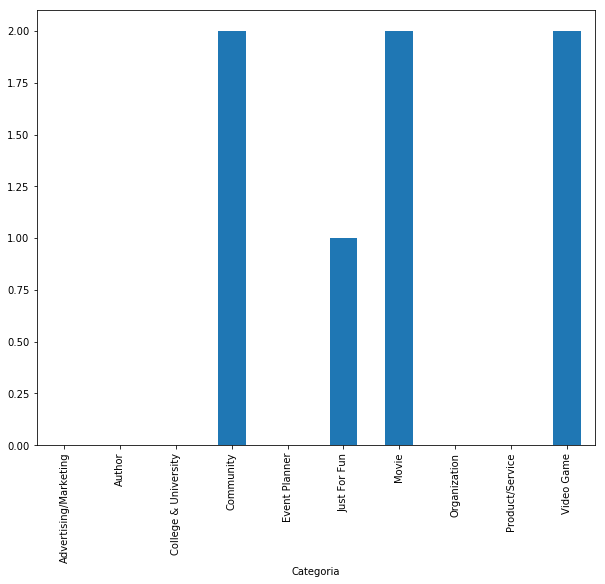

In [16]:
likes_counts = df.groupby(['Categoria'])['Quantidade'].sum()
likes_counts.plot(kind='bar')

## Histograma de afinidade
O histograma abaixo exibe a afinidade entre o usuario e os seus amigos

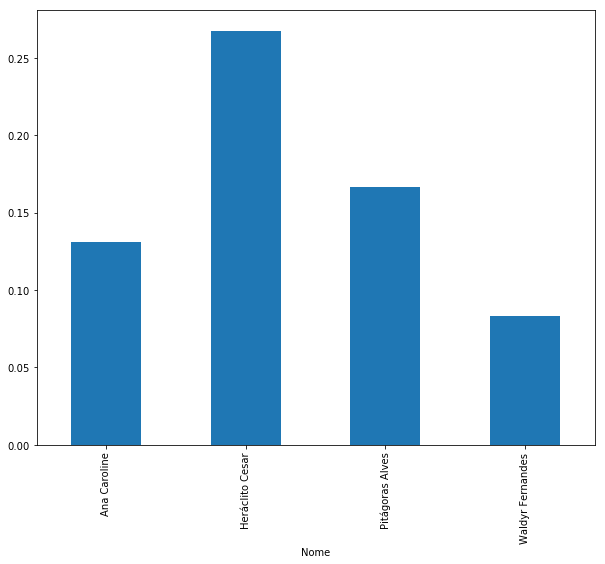

In [17]:
af = pd.DataFrame()
af['Nome'] = dictAmizade.keys()
af['Pontos'] = dictAmizade.values()

afinidade = af.groupby(['Nome'])['Pontos'].sum()
afinidade.plot(kind='bar')